# Import defualt neccessary package

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [6]:
# preprocessing
data = pd.read_csv('../data/left_foot_data.csv')
data = data.drop(['order'], axis=1) 
data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height
0,Normal,23.700,20.491,8.038,16.799,14.899,9.661,5.149,10.246,2.95
1,Normal,25.805,21.077,8.417,18.155,16.506,10.358,6.057,10.589,3.61
2,High,22.315,19.182,7.381,16.145,14.155,9.515,5.680,9.591,3.54
3,Normal,23.366,19.556,7.191,17.045,14.642,8.949,5.698,9.778,3.52
4,High,21.323,18.338,6.821,15.635,14.316,8.507,5.337,9.169,3.39
5,Flat,23.786,20.606,7.946,17.446,15.679,9.785,5.408,10.303,3.34
6,Flat,22.652,19.242,7.362,16.919,14.624,8.516,4.966,9.621,3.03
7,Flat,23.058,18.924,7.528,16.397,14.595,8.955,5.037,9.462,2.70
8,High,24.949,21.021,8.581,18.168,15.908,10.000,5.874,10.511,3.48
9,High,22.089,18.893,7.515,16.247,14.124,9.978,5.106,9.447,3.47


In [18]:
# Encode label type
clean_up = {'foot_type':{'Normal': 0, 'Flat': 1, 'High': 2}}
encoded_data = data.replace(clean_up)
encoded_data

,foot_type,heel_to_fore,heel_to_distal_metatrasal,middle_foot_width,heel_to_apex1,heel_to_apex5,apex1_to_apex5,heel_width,heel_to_middle,arch_height
0,0,23.700,20.491,8.038,16.799,14.899,9.661,5.149,10.246,2.95
1,0,25.805,21.077,8.417,18.155,16.506,10.358,6.057,10.589,3.61
2,2,22.315,19.182,7.381,16.145,14.155,9.515,5.680,9.591,3.54
3,0,23.366,19.556,7.191,17.045,14.642,8.949,5.698,9.778,3.52
4,2,21.323,18.338,6.821,15.635,14.316,8.507,5.337,9.169,3.39
5,1,23.786,20.606,7.946,17.446,15.679,9.785,5.408,10.303,3.34
6,1,22.652,19.242,7.362,16.919,14.624,8.516,4.966,9.621,3.03
7,1,23.058,18.924,7.528,16.397,14.595,8.955,5.037,9.462,2.70
8,2,24.949,21.021,8.581,18.168,15.908,10.000,5.874,10.511,3.48
9,2,22.089,18.893,7.515,16.247,14.124,9.978,5.106,9.447,3.47


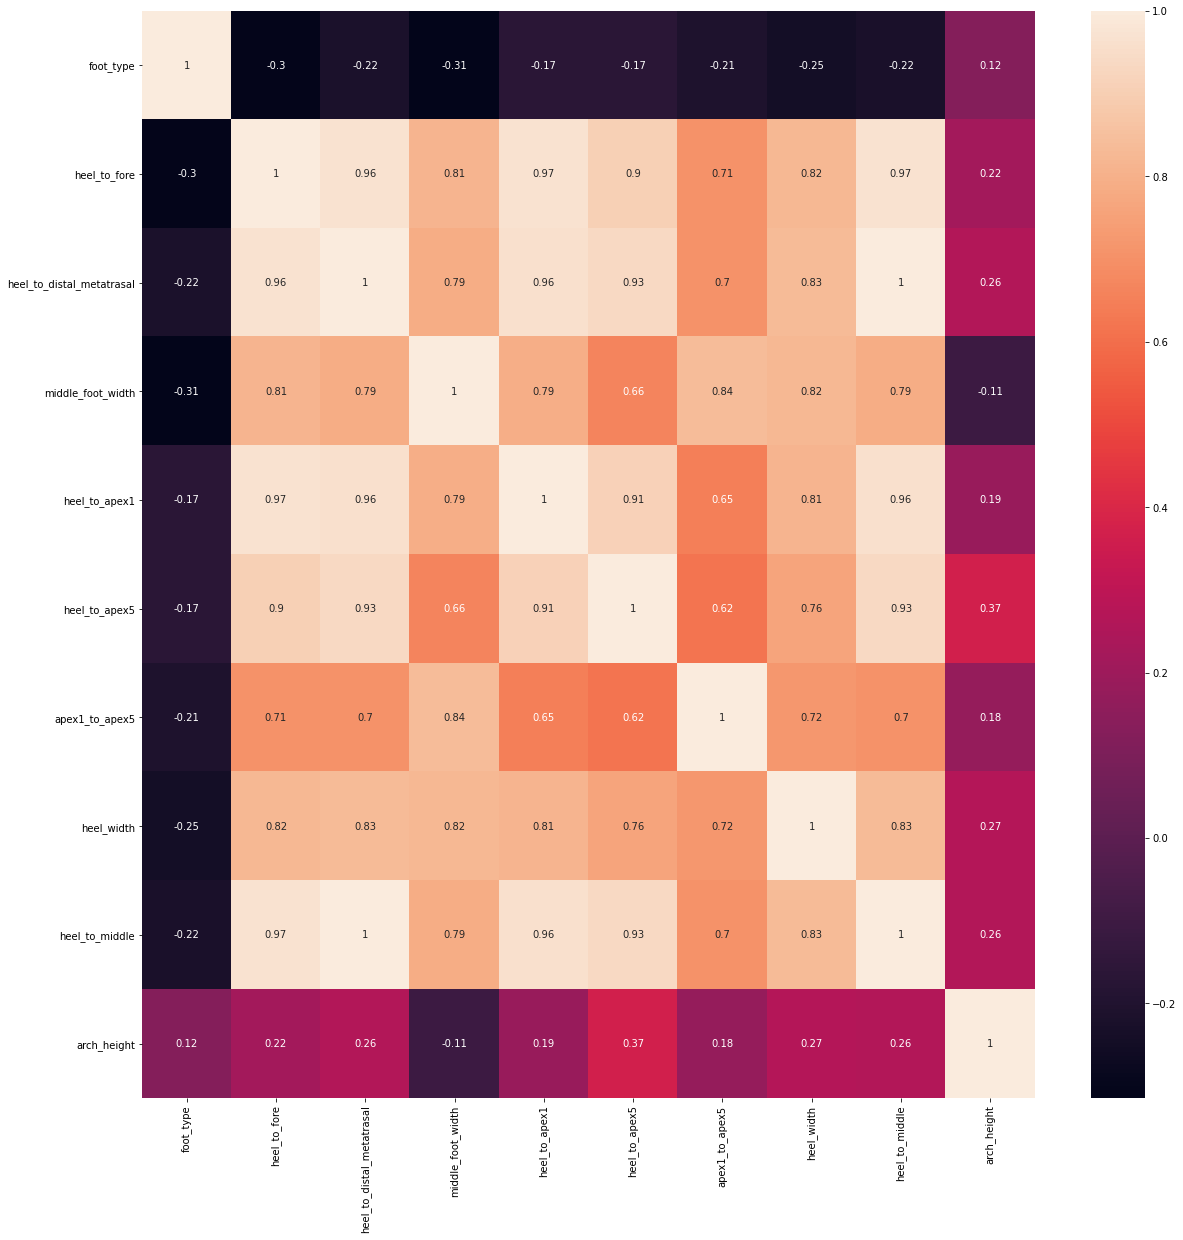

In [24]:
corrmat = encoded_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(encoded_data[top_corr_features].corr(),annot=True)

In [21]:
# Select only features that have correlation with arch height more tham 0.20
features = encoded_data[['heel_to_fore', 'heel_to_distal_metatrasal', 'heel_to_apex5', 'heel_width', 'heel_to_middle']]
target = encoded_data[['arch_height']]